<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/Analise_loja_cosmeticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Etapa 1: Carregamento de dados**

en este notebook hacemos un tratamiento de datos 'basico' para analzar las ventas de una tienda de cosmeticos, hacemos la tratativa normal pero tambien usando unos comandos para agilizar el tratamiento de datos para saber si nuestros datos estan como lo dejeado

In [ ]:
import pandas as pd

# Carregando os dados
clientes_df = pd.read_csv('clientes.csv')
vendas_df = pd.read_csv('vendas.csv')

In [ ]:
import sqlite3

# Conectar ao banco de dados SQLite (irá criá-lo se não existir)
conn = sqlite3.connect('produtos.db')
cursor = conn.cursor()

# Ler o conteúdo do arquivo SQL
with open('produtos.sql', 'r') as file:
    sql_script = file.read()

# Executar o script SQL
cursor.executescript(sql_script)

# Ler dados da tabela
query = "SELECT * FROM produtocomestico"
produtos_df = pd.read_sql_query(query, conn)

# Fechar a conexão
cursor.close()
conn.close()

In [ ]:
produtos_df.to_csv('sample_data/teste.csv')

**Etapa 2: Tratamento de Dados Faltantes e Correção de Tipos de Dados**

Clientes:

In [ ]:
clientes_df.head(20)

,ID do Cliente,Nome do Cliente,Email,Telefone,Cidade,Estado,País,Data de Cadastro
0,1,Brett Oconnor,zwall@example.org,+1-421-594-7430x471,North Anthonyborough,Ohio,Norfolk Island,2019-02-19
1,2,Brian Frey,woodjerry@example.net,589.799.7970x711,Montgomerychester,Mississippi,Colombia,2020-07-29
2,3,Taylor Schneider,dparsons@example.net,+1-755-320-5703,West Michellefort,South Dakota,Italy,2021-09-30
3,4,Vincent Simpson,brittney35@example.org,976-805-7902x63860,Edwardsport,Alabama,Lebanon,2023-03-09
4,5,Michael Vance,smay@example.net,844-657-1149x840,Lake Michaelview,Maryland,Gibraltar,2019-10-05
5,6,Teresa Garcia,vfreeman@example.com,980.730.8663x02715,North Christopher,Maine,Comoros,2020-07-10
6,7,Michael Richard,jholmes@example.com,+1-416-535-8646x870,Lake Jennifer,Kentucky,Turkmenistan,2021-02-01
7,8,Justin Romero,meyerjason@example.net,(946)807-5952,Lovefurt,Idaho,Poland,2022-04-14
8,9,Mrs. Jessica Ramos,torrestony@example.org,3503142918,Johnsonmouth,Vermont,Zambia,2020-02-28
9,10,William Ray,brownmariah@example.net,+1-680-537-5067x3716,New Rachel,Minnesota,Australia,2020-08-25


In [ ]:
# Verificando valores faltantes em todas as colunas
valores_faltantes = clientes_df.isnull().sum()

# Exibindo os valores faltantes
print(valores_faltantes)

ID do Cliente       0
Nome do Cliente     0
Email               0
Telefone            0
Cidade              0
Estado              0
País                0
Data de Cadastro    0
dtype: int64


In [ ]:
# Tratamento de Dados Faltantes e Correção de Tipos de Dados
clientes_df['ID do Cliente'].fillna(0, inplace=True)  # Substituindo IDs faltantes por 0 (ou escolha um valor apropriado)
clientes_df['Nome do Cliente'].fillna('', inplace=True)
clientes_df['Email'].fillna('Desconhecido', inplace=True)
clientes_df['Telefone'].fillna('Desconhecido', inplace=True)
clientes_df['Cidade'].fillna('Desconhecida', inplace=True)
clientes_df['Estado'].fillna('Desconhecido', inplace=True)
clientes_df['País'].fillna('Desconhecido', inplace=True)
clientes_df['Data de Cadastro'].fillna('2000-01-01', inplace=True)  # Substituindo datas faltantes por uma data padrão

clientes_df.dtypes

ID do Cliente        int64
Nome do Cliente     object
Email               object
Telefone            object
Cidade              object
Estado              object
País                object
Data de Cadastro    object
dtype: object

In [ ]:
# Corrigindo tipos de dados
clientes_df['ID do Cliente'] = clientes_df['ID do Cliente'].astype(int)
clientes_df['Data de Cadastro'] = pd.to_datetime(clientes_df['Data de Cadastro'])

# Verificando se a correção funcionou
clientes_df.dtypes

ID do Cliente                int64
Nome do Cliente             object
Email                       object
Telefone                    object
Cidade                      object
Estado                      object
País                        object
Data de Cadastro    datetime64[ns]
dtype: object

Vendas:

In [ ]:
vendas_df.head()

,ID Venda,ID Produto,ID Cliente,Quantidade Vendida,Data da Venda,Preço Total
0,1,14,92,3,2023-07-23,151.38
1,2,82,34,1,2023-07-14,412.17
2,3,98,78,8,2023-08-19,473.28
3,4,85,4,5,2022-11-04,356.87
4,5,57,77,1,2023-07-26,875.70


In [ ]:
# Verificando valores faltantes em todas as colunas
valores_faltantes = vendas_df.isnull().sum()

# Exibindo os valores faltantes
print(valores_faltantes)

ID Venda              0
ID Produto            0
ID Cliente            0
Quantidade Vendida    0
Data da Venda         0
Preço Total           0
dtype: int64


In [ ]:
vendas_df.dtypes

ID Venda                int64
ID Produto              int64
ID Cliente              int64
Quantidade Vendida      int64
Data da Venda          object
Preço Total           float64
dtype: object

In [ ]:
# Corrigindo tipos de dados
vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'])

# Verificando se a correção funcionou
vendas_df.dtypes

ID Venda                       int64
ID Produto                     int64
ID Cliente                     int64
Quantidade Vendida             int64
Data da Venda         datetime64[ns]
Preço Total                  float64
dtype: object

Produtos:

In [ ]:
produtos_df.head()

,id,nome,marca,data_lancamento,descricao,preco,quantidade,categoria
0,1,Base Líquida,Maybelline,2020-03-01,Base líquida matte de alta cobertura,59.99,50,base
1,2,Blush Rosê,Avon,2022-05-15,Blush em pó na cor rosê,29.99,100,blush
2,3,Rímel Alongamento,Maybelline,2021-11-30,Rímel que alonga e define os cílios,19.99,150,olhos
3,4,Paleta de Sombras,Avon,2023-02-05,Paleta com 12 cores de sombras em tons terrosos,39.99,200,olhos
4,5,Pó Compacto,Maybelline,2022-01-05,Pó compacto matte para controle de oleosidade,45.99,80,face


In [ ]:
# Verificando valores faltantes em todas as colunas
valores_faltantes = produtos_df.isnull().sum()

# Exibindo os valores faltantes
print(valores_faltantes)

id                 0
nome               0
marca              0
data_lancamento    0
descricao          0
preco              0
quantidade         0
categoria          0
dtype: int64


In [ ]:

produtos_df.dtypes

id                   int64
nome                object
marca               object
data_lancamento     object
descricao           object
preco              float64
quantidade           int64
categoria           object
dtype: object

In [ ]:
# Corrigindo tipos de dados
produtos_df['data_lancamento'] = pd.to_datetime(produtos_df['data_lancamento'])

# Verificando se a correção funcionou
produtos_df.dtypes

id                          int64
nome                       object
marca                      object
data_lancamento    datetime64[ns]
descricao                  object
preco                     float64
quantidade                  int64
categoria                  object
dtype: object

**Etapa 3: Removendo Duplicatas**

In [ ]:
# Verificando duplicatas nos dois DataFrames
clientes_df.duplicated().sum()
vendas_df.duplicated().sum()
produtos_df.duplicated().sum()



0

In [ ]:
# Removendo duplicatas
clientes_df.drop_duplicates(inplace=True)
vendas_df.drop_duplicates(inplace=True)
produtos_df.drop_duplicates(inplace=True)

**Etapa 4: Tratando Outliers**

In [ ]:
from scipy.stats import zscore

# Exemplo: tratamento de outliers na coluna 'Preço Total' de vendas_df
z_scores = zscore(vendas_df['Preço Total'])

z_scores.head(20)

0    -1.361231
1    -0.422360
2    -0.202358
3    -0.621446
4     1.246396
5    -0.185293
6     0.277320
7    -0.136800
8     1.341871
9    -0.332357
10    0.808156
11   -1.866577
12    1.584302
13   -1.163477
14   -0.627170
15    0.849197
16    0.077623
17    0.859421
18    1.334383
19   -1.321702
Name: Preço Total, dtype: float64

In [ ]:
outliers = (z_scores > 3) | (z_scores < -3)

outliers.head()

0    False
1    False
2    False
3    False
4    False
Name: Preço Total, dtype: bool

In [ ]:
vendas_df = vendas_df[~outliers]

vendas_df.head()

,ID Venda,ID Produto,ID Cliente,Quantidade Vendida,Data da Venda,Preço Total
0,1,14,92,3,2023-07-23,151.38
1,2,82,34,1,2023-07-14,412.17
2,3,98,78,8,2023-08-19,473.28
3,4,85,4,5,2022-11-04,356.87
4,5,57,77,1,2023-07-26,875.70


**Etapa 5: Segmentação de Clientes**

In [ ]:
# Juntando os DataFrames com base no ID do Cliente
dados_completos_df = pd.merge(vendas_df, clientes_df, left_on='ID Cliente', right_on='ID do Cliente', how='inner')


dados_completos_df.head()

,ID Venda,ID Produto,ID Cliente,Quantidade Vendida,Data da Venda,Preço Total,ID do Cliente,Nome do Cliente,Email,Telefone,Cidade,Estado,País,Data de Cadastro
0,1,14,92,3,2023-07-23,151.38,92,Alexis Townsend,kathrynking@example.org,(257)666-9091x41958,Brianport,Montana,Saint Vincent and the Grenadines,2020-12-09
1,2,82,34,1,2023-07-14,412.17,34,Isaac Clark,lunarobin@example.com,(538)538-6312,West Audrey,Michigan,Gambia,2019-05-17
2,75,35,34,2,2022-11-27,987.28,34,Isaac Clark,lunarobin@example.com,(538)538-6312,West Audrey,Michigan,Gambia,2019-05-17
3,3,98,78,8,2023-08-19,473.28,78,Paul Munoz,dyerbrandon@example.com,(820)805-5087x831,Pruittstad,Massachusetts,Norfolk Island,2021-09-14
4,4,85,4,5,2022-11-04,356.87,4,Vincent Simpson,brittney35@example.org,976-805-7902x63860,Edwardsport,Alabama,Lebanon,2023-03-09


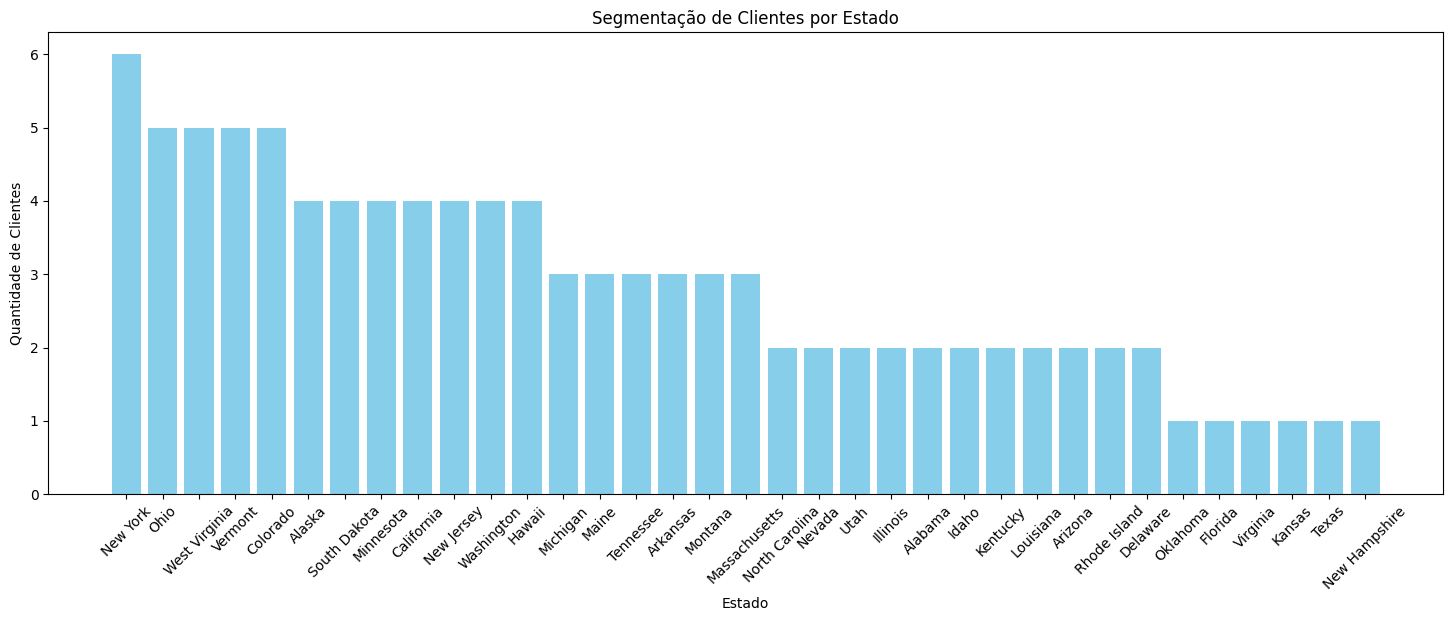

In [ ]:
import matplotlib.pyplot as plt

segmentacao_clientes = dados_completos_df['Estado'].value_counts()

plt.figure(figsize=(18, 6))
plt.bar(segmentacao_clientes.index, segmentacao_clientes.values, color='skyblue')
plt.title('Segmentação de Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=45)
plt.show()

# Este gráfico de barras mostrará quantos clientes existem em cada estado. Isso pode ser útil para entender a distribuição geográfica mais detalhada.

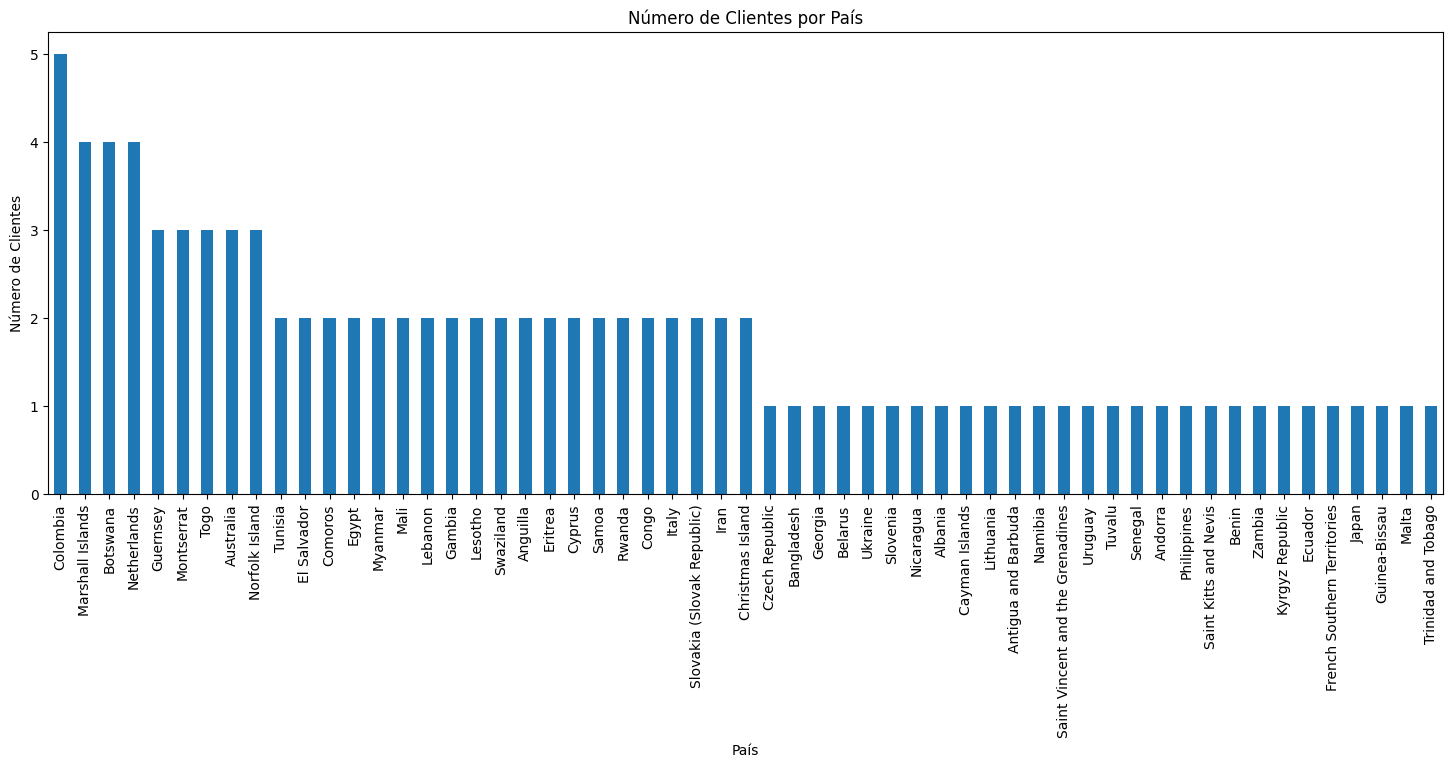

In [ ]:
import matplotlib.pyplot as plt

# Contagem de clientes por país
clientes_por_pais = dados_completos_df['País'].value_counts()

plt.figure(figsize=(18, 6))
clientes_por_pais.plot(kind='bar')
plt.title('Número de Clientes por País')
plt.xlabel('País')
plt.ylabel('Número de Clientes')
plt.show()

# Este gráfico de barras mostrará quantos clientes existem em cada país. Isso pode ser útil para entender a distribuição geográfica da sua base de clientes.

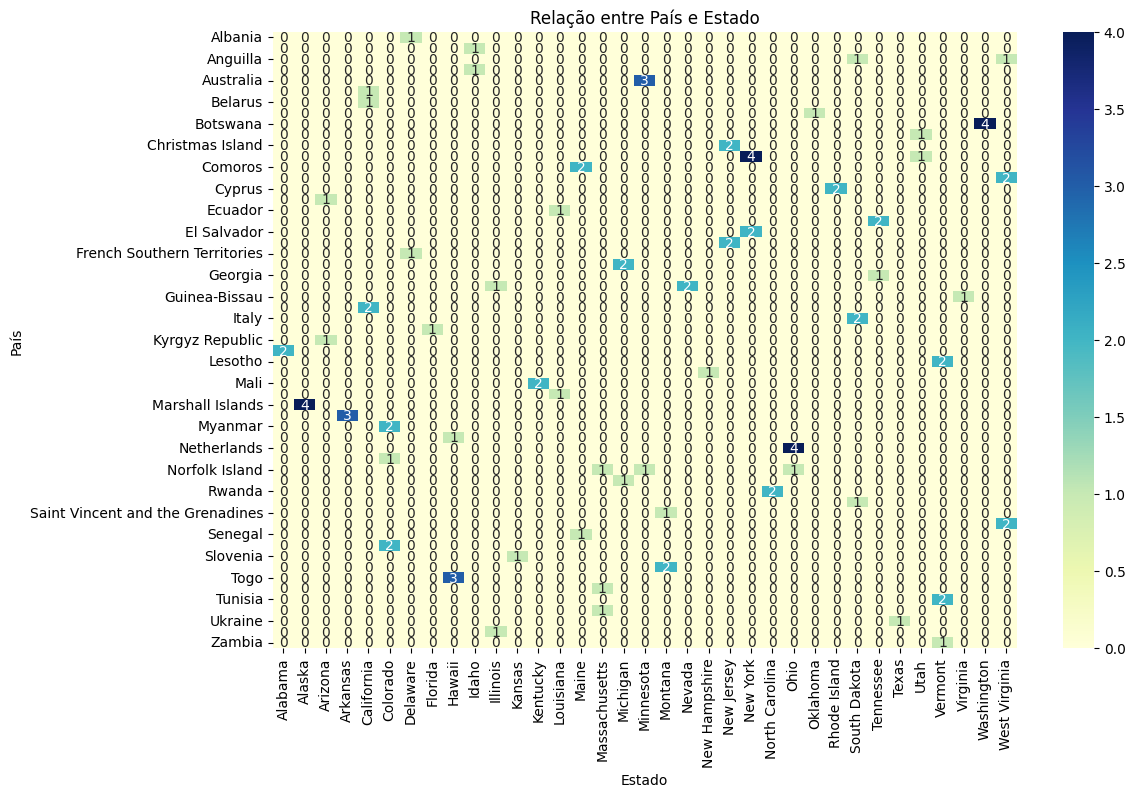

In [ ]:
import seaborn as sns

# Criação de uma tabela de contingência entre País e Estado
tabela_contingencia = pd.crosstab(dados_completos_df['País'], dados_completos_df['Estado'])

plt.figure(figsize=(12, 8))
sns.heatmap(tabela_contingencia, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Relação entre País e Estado')
plt.show()

# Este heatmap de correlação entre País e Estado mostrará a distribuição de clientes em diferentes países e estados.
# Isso pode ajudar a identificar se existem países com uma presença mais forte em determinados estados.

Lembrando que essas são apenas algumas sugestões iniciais.

**Etapa 6: Produtos mais Vendidos**

In [ ]:
produtos_mais_vendidos = dados_completos_df.groupby('ID Produto')['Quantidade Vendida'].sum().sort_values(ascending=False).reset_index()

# Exibindo os produtos mais vendidos
produtos_mais_vendidos.head(5)  # Exibindo os 5 produtos mais vendidos

,ID Produto,Quantidade Vendida
0,39,19
1,19,18
2,58,17
3,56,17
4,85,17


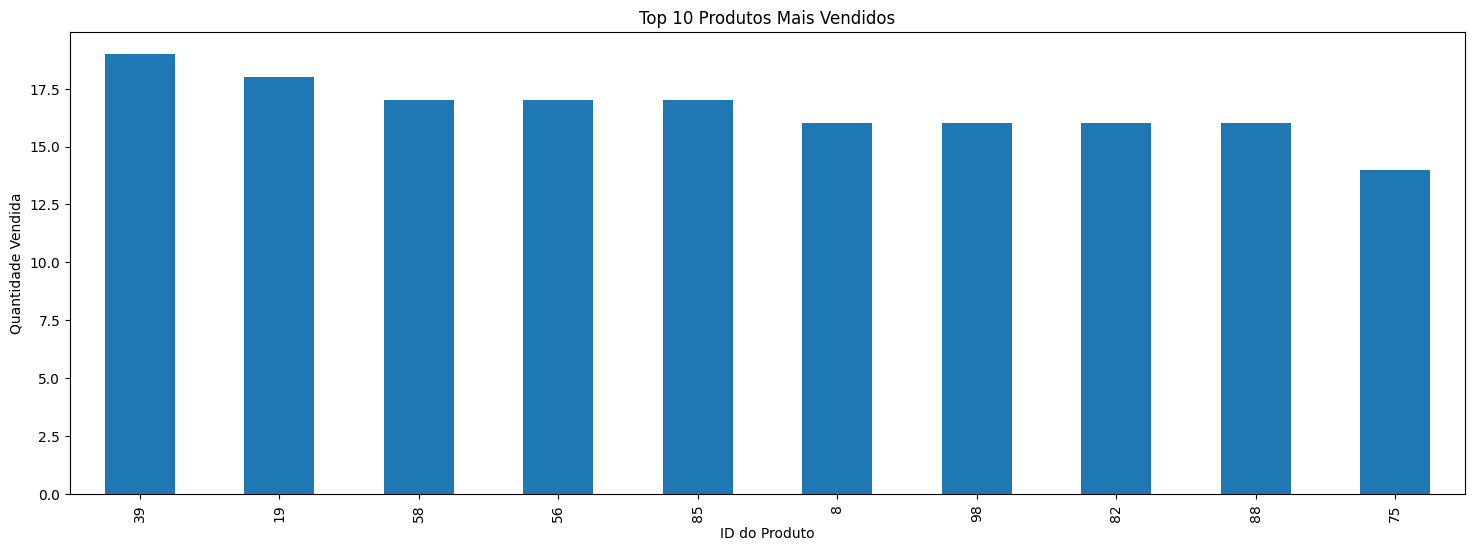

In [ ]:
import matplotlib.pyplot as plt

# Selecionando os 10 produtos mais vendidos (ou o número de produtos que desejar)
top_produtos = produtos_mais_vendidos.head(10)

plt.figure(figsize=(18, 6))
top_produtos.plot(kind='bar')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('ID do Produto')
plt.ylabel('Quantidade Vendida')
plt.show()

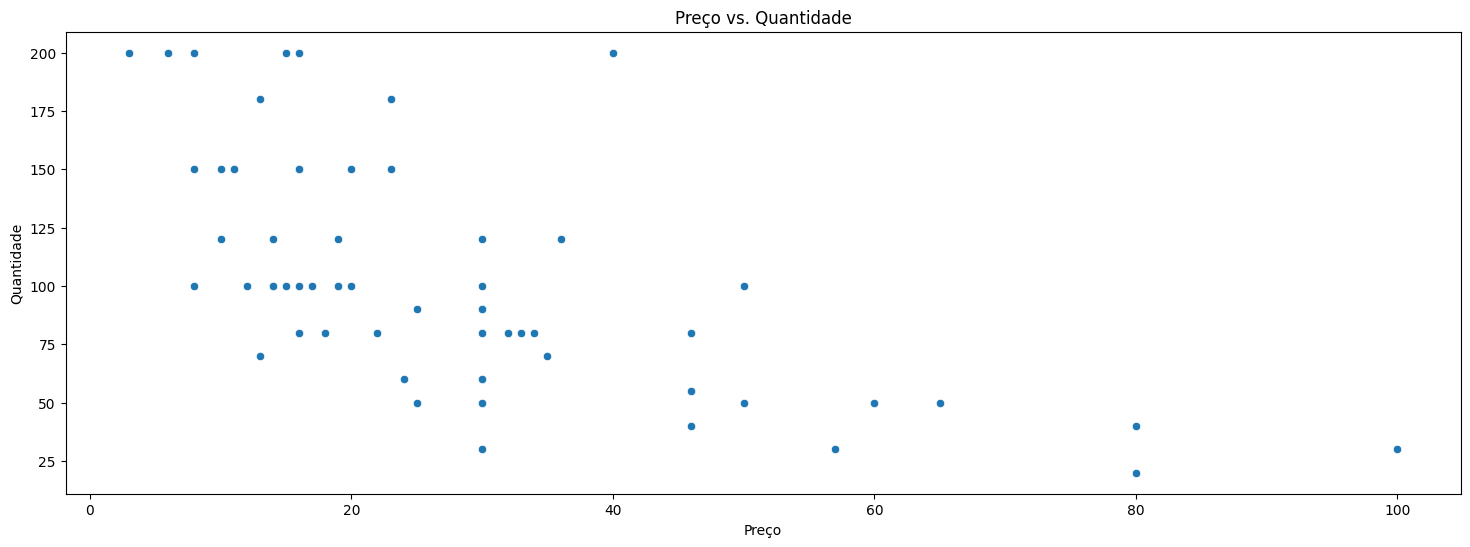

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Dispersão (Preço vs. Quantidade)
plt.figure(figsize=(18, 6))
sns.scatterplot(x='preco', y='quantidade', data=produtos_df)
plt.title('Preço vs. Quantidade')
plt.xlabel('Preço')
plt.ylabel('Quantidade')
plt.show()

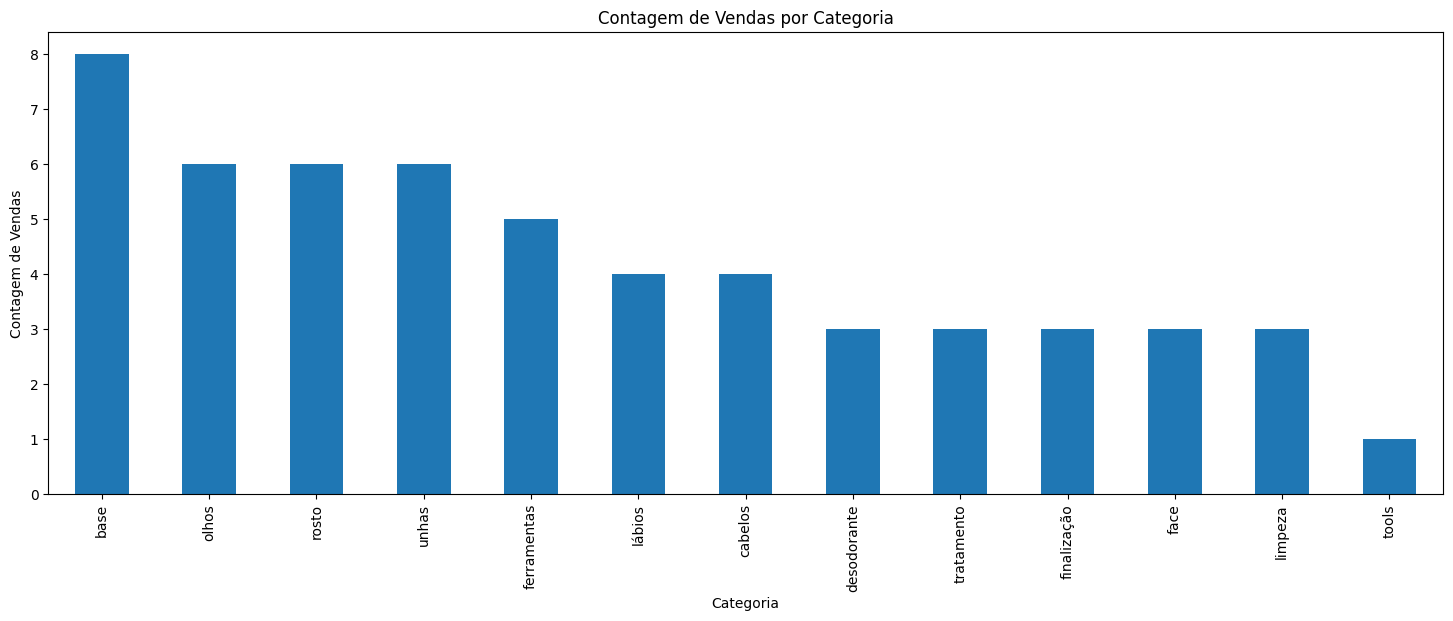

In [ ]:
# Vamos unir os DataFrames de Vendas e Produtos usando merge
df_completo = pd.merge(vendas_df, produtos_df, left_on='ID Produto', right_on='id', how='inner')

# Contagem de vendas por categoria
contagem_categoria = df_completo['categoria'].value_counts()
contagem_categoria.plot(kind='bar', figsize=(18, 6), title='Contagem de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Contagem de Vendas')
plt.show()

**Etapa 7: Análise Temporal**

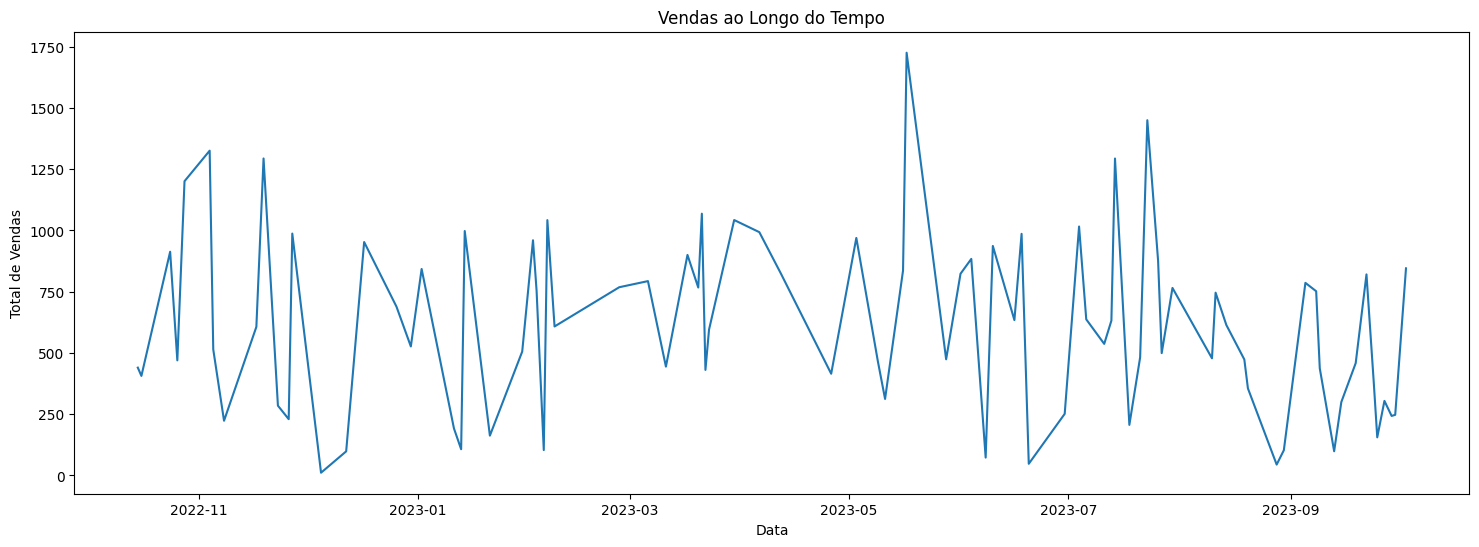

In [ ]:
# Convertendo a coluna de datas para o formato datetime
dados_completos_df['Data da Venda'] = pd.to_datetime(dados_completos_df['Data da Venda'])

# Criando uma série temporal
serie_temporal = dados_completos_df.groupby('Data da Venda')['Preço Total'].sum()

# Visualizando a série temporal
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(serie_temporal.index, serie_temporal.values)
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.show()